In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
from config import Config
from kmeans import distance, find_anchor_boxes, get_average_IoU, get_kmeans_values_from_annotations, format_anchors

In [4]:
cfg_path = r"C:\Users\Gencho\Desktop\ObjectDetection\experiments\mobilenetyolov2-voc.cfg"
config = Config(cfg_path)

grid_width = config.get('grid_width')
grid_height = config.get('grid_height')

annotations_path = '.\VOCdevkit\VOC2007\Annotations'

In [5]:
kmeans_values = get_kmeans_values_from_annotations(annotations_path, grid_width, grid_height)

In [7]:
start = time.time()
centers, clusters = find_anchor_boxes(kmeans_values, 5)
end = time.time()
print(f'Ran KMeans for 5 clusters in {(end - start):.2f}s')

start = time.time()
average_IoU = get_average_IoU(kmeans_values, centers)
end = time.time()
print(f'Calculated average IoU in {(end - start):.2f}s')

print(f'Average IoU: {average_IoU}')
print(format_anchors(centers))

Ran KMeans for 5 clusters in 17.76s
Calculated average IoU in 0.68s
Average IoU: 0.691346300703301
[1.29, 2.14, 2.77, 4.77, 4.39, 9.02, 7.75, 5.29, 10.16, 10.48]


For 1 clusters: Average IoU: 0.40704424692329755, ran KMeans in: 0.51s
For 2 clusters: Average IoU: 0.567311707773962, ran KMeans in: 2.68s
For 3 clusters: Average IoU: 0.6363471024861568, ran KMeans in: 8.06s
For 4 clusters: Average IoU: 0.6592978147601373, ran KMeans in: 13.99s
For 5 clusters: Average IoU: 0.6913514495402181, ran KMeans in: 21.58s
For 6 clusters: Average IoU: 0.7083418977844872, ran KMeans in: 38.30s
For 7 clusters: Average IoU: 0.7280821071925312, ran KMeans in: 70.68s
For 8 clusters: Average IoU: 0.7405107122793483, ran KMeans in: 40.77s
For 9 clusters: Average IoU: 0.7481211615246072, ran KMeans in: 55.98s
For 10 clusters: Average IoU: 0.7620435978034876, ran KMeans in: 95.08s
For 11 clusters: Average IoU: 0.7698218837287808, ran KMeans in: 81.86s
For 12 clusters: Average IoU: 0.776725849030763, ran KMeans in: 78.22s
For 13 clusters: Average IoU: 0.7849399524042504, ran KMeans in: 90.47s
For 14 clusters: Average IoU: 0.7897901955429307, ran KMeans in: 67.53s
For 1

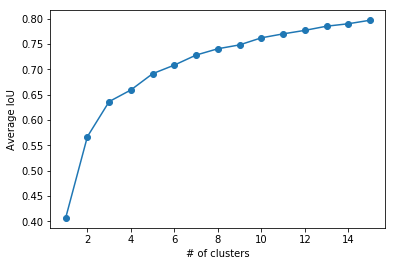

In [8]:
ks = []
anchors = []
IoUs = []
for k in range(1, 16):   
    start = time.time()
    
    ks.append(k)
    
    centers, clusters = find_anchor_boxes(kmeans_values, k)
    anchors.append(centers)
    average_IoU = get_average_IoU(kmeans_values, centers)
    IoUs.append(average_IoU)
    
    end = time.time()
    print(f'For {k} clusters: Average IoU: {average_IoU}, ran KMeans in: {(end - start):.2f}s')
    
plt.plot(ks, IoUs, marker='o')
plt.xlabel('# of clusters')
plt.ylabel('Average IoU')
plt.show()

In [10]:
for i in range(len(anchors)):
    print(ks[i])
    print(format_anchors(anchors[i]))
    print()

1
[4.36, 5.66]

2
[1.98, 3.36, 7.48, 8.66]

3
[1.53, 2.6, 4.04, 6.49, 9.45, 9.53]

4
[1.48, 2.44, 3.15, 6.51, 7.27, 5.67, 9.3, 10.54]

5
[1.29, 2.14, 2.77, 4.77, 4.39, 9.02, 7.74, 5.29, 10.16, 10.48]

6
[1.25, 2.07, 2.14, 5.33, 4.49, 3.83, 4.57, 8.98, 9.03, 6.19, 10.2, 10.97]

7
[1.21, 1.8, 1.88, 4.15, 3.16, 7.72, 4.83, 4.02, 5.95, 9.8, 9.42, 6.19, 10.88, 11.01]

8
[1.13, 1.79, 1.7, 4.33, 3.08, 7.81, 3.78, 3.02, 5.45, 5.39, 6.09, 10.15, 9.96, 6.44, 11.0, 11.14]

9
[1.11, 1.76, 1.6, 4.34, 2.92, 7.87, 3.36, 3.01, 4.86, 5.68, 5.88, 10.16, 8.54, 4.17, 9.97, 7.49, 10.91, 11.47]

10
[1.1, 1.5, 1.3, 3.38, 2.21, 5.69, 3.37, 2.92, 3.44, 8.98, 4.95, 5.65, 6.48, 10.21, 8.58, 4.3, 10.27, 7.48, 11.13, 11.51]

11
[0.97, 1.65, 1.34, 4.24, 2.44, 2.47, 2.77, 5.69, 3.4, 9.23, 4.83, 3.64, 5.7, 6.79, 6.61, 10.84, 9.63, 4.78, 10.35, 8.1, 11.33, 11.69]

12
[1.01, 1.53, 1.24, 3.65, 2.06, 6.58, 2.62, 2.63, 3.59, 5.2, 3.81, 9.42, 5.63, 3.44, 6.1, 6.96, 6.94, 10.94, 9.9, 4.96, 10.56, 8.2, 11.43, 11.75]

13
[0.9